
Simulation Results:
Number of problems solved: 10000
Average solution time: 3.32
Theoretical expected time: 3.33
Average number of attempts: 3.33
Theoretical expected attempts: 3.33


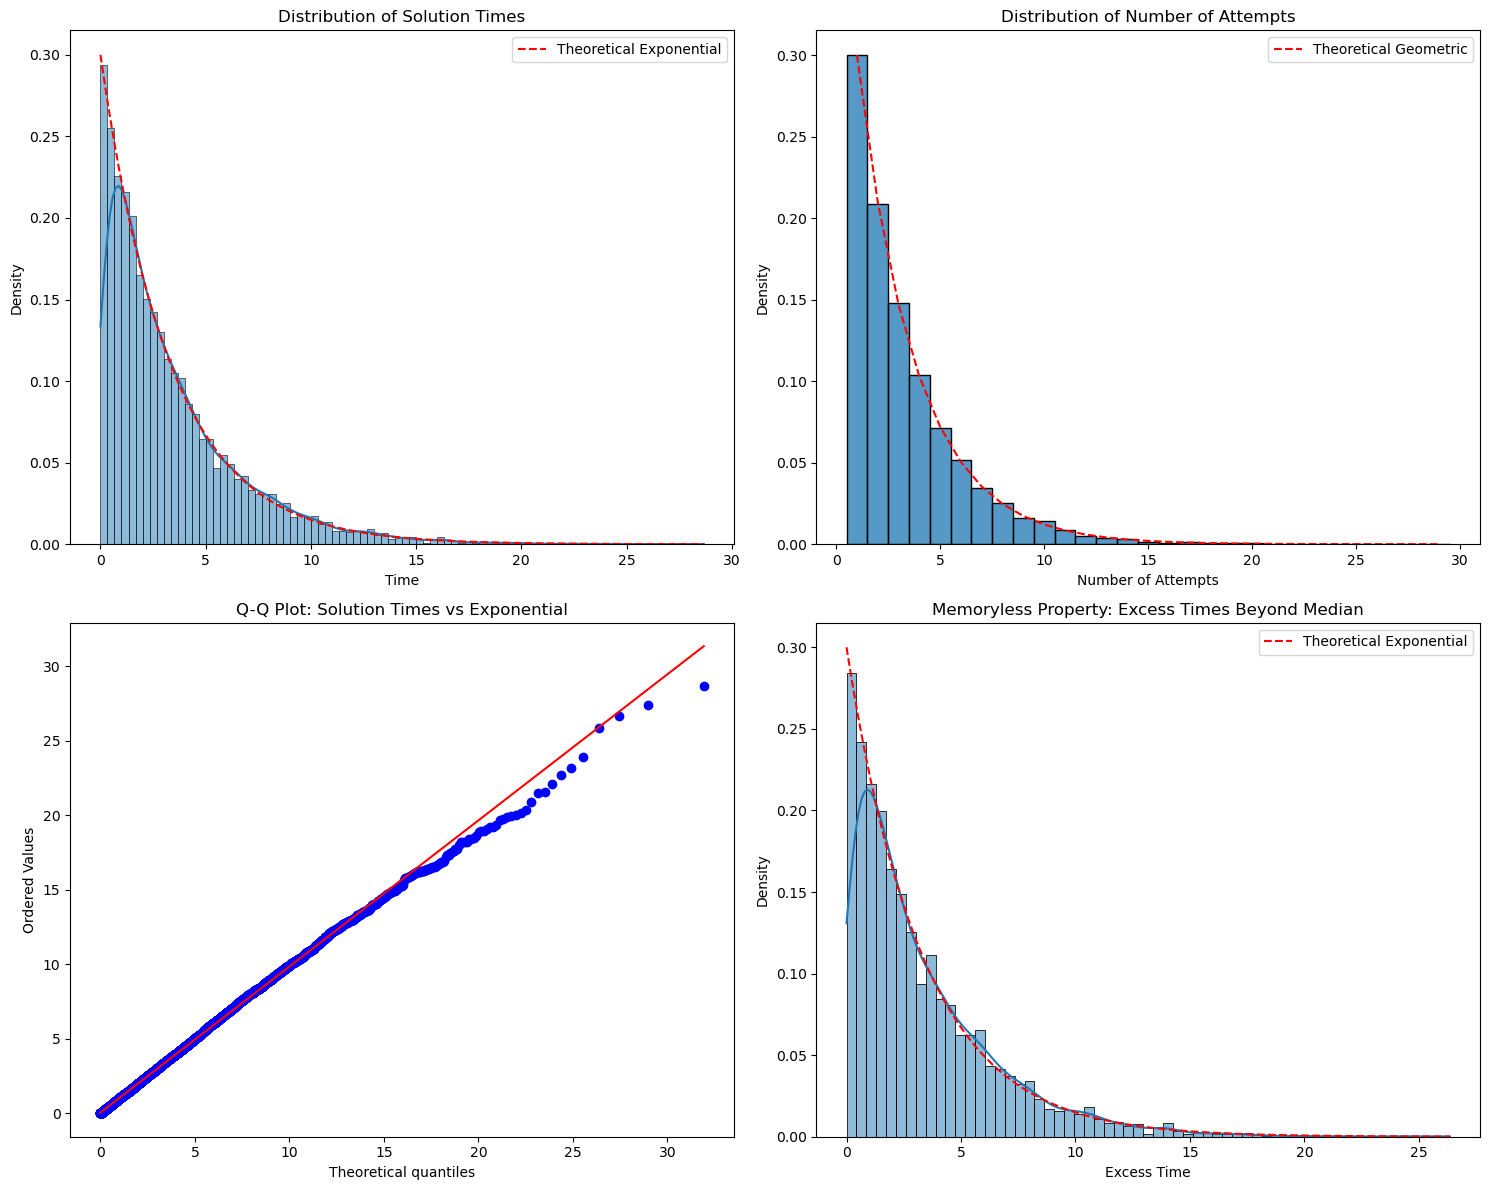

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from typing import List, Tuple

class ProblemSolvingSimulation:
    def __init__(self, lambda_rate: float, success_prob: float):
        """
        Initialize simulation parameters.
        
        Args:
            lambda_rate: Rate parameter for exponential distribution of attempt times
            success_prob: Probability of success for each attempt
        """
        self.lambda_rate = lambda_rate
        self.success_prob = success_prob
        
    def single_attempt(self) -> Tuple[float, bool]:
        """Simulate a single problem-solving attempt."""
        time = np.random.exponential(1/self.lambda_rate)
        success = np.random.random() < self.success_prob
        return time, success
    
    def solve_problem(self) -> Tuple[float, int]:
        """
        Simulate attempts until problem is solved.
        
        Returns:
            Tuple of (total_time, number_of_attempts)
        """
        total_time = 0
        attempts = 0
        
        while True:
            time, success = self.single_attempt()
            total_time += time
            attempts += 1
            
            if success:
                break
                
        return total_time, attempts

    def run_simulation(self, n_problems: int) -> Tuple[np.ndarray, np.ndarray]:
        """
        Simulate solving multiple problems.
        
        Args:
            n_problems: Number of problems to simulate
            
        Returns:
            Arrays of solution times and number of attempts
        """
        times = np.zeros(n_problems)
        attempts = np.zeros(n_problems)
        
        for i in range(n_problems):
            times[i], attempts[i] = self.solve_problem()
            
        return times, attempts
    
    def plot_results(self, times: np.ndarray, attempts: np.ndarray):
        """Create visualizations of simulation results."""
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
        
        # Distribution of solution times
        sns.histplot(times, stat='density', kde=True, ax=ax1)
        x = np.linspace(0, max(times), 100)
        theoretical_exp = stats.expon.pdf(x, scale=1/(self.success_prob * self.lambda_rate))
        ax1.plot(x, theoretical_exp, 'r--', label='Theoretical Exponential')
        ax1.set_title('Distribution of Solution Times')
        ax1.set_xlabel('Time')
        ax1.set_ylabel('Density')
        ax1.legend()
        
        # Distribution of number of attempts
        sns.histplot(attempts, stat='density', discrete=True, ax=ax2)
        x_geom = np.arange(1, max(attempts) + 1)
        theoretical_geom = stats.geom.pmf(x_geom, self.success_prob)
        ax2.plot(x_geom, theoretical_geom, 'r--', label='Theoretical Geometric')
        ax2.set_title('Distribution of Number of Attempts')
        ax2.set_xlabel('Number of Attempts')
        ax2.set_ylabel('Density')
        ax2.legend()
        
        # Q-Q plot for exponential distribution
        stats.probplot(times, dist="expon", sparams=(0, 1/(self.success_prob * self.lambda_rate)), 
                      plot=ax3)
        ax3.set_title('Q-Q Plot: Solution Times vs Exponential')
        
        # Memoryless property visualization
        excess_times = []
        threshold = np.median(times)
        for t in times:
            if t > threshold:
                excess_times.append(t - threshold)
        
        sns.histplot(excess_times, stat='density', kde=True, ax=ax4)
        x = np.linspace(0, max(excess_times), 100)
        theoretical_excess = stats.expon.pdf(x, scale=1/(self.success_prob * self.lambda_rate))
        ax4.plot(x, theoretical_excess, 'r--', label='Theoretical Exponential')
        ax4.set_title('Memoryless Property: Excess Times Beyond Median')
        ax4.set_xlabel('Excess Time')
        ax4.set_ylabel('Density')
        ax4.legend()
        
        plt.tight_layout()
        return fig

def main():
    # Set random seed for reproducibility
    np.random.seed(42)
    
    # Simulation parameters
    lambda_rate = 1.0  # Rate parameter for attempt times
    success_prob = 0.3  # Probability of success for each attempt
    n_problems = 10000  # Number of problems to simulate
    
    # Run simulation
    sim = ProblemSolvingSimulation(lambda_rate, success_prob)
    times, attempts = sim.run_simulation(n_problems)
    
    # Print summary statistics
    print("\nSimulation Results:")
    print(f"Number of problems solved: {n_problems}")
    print(f"Average solution time: {np.mean(times):.2f}")
    print(f"Theoretical expected time: {1/(success_prob * lambda_rate):.2f}")
    print(f"Average number of attempts: {np.mean(attempts):.2f}")
    print(f"Theoretical expected attempts: {1/success_prob:.2f}")
    
    # Create visualizations
    fig = sim.plot_results(times, attempts)
    plt.show()

if __name__ == "__main__":
    main()